In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
dataframe_study = pd.read_csv("datasetAgrupado90.csv")

In [5]:
dataframe_study.drop(columns="Unnamed: 0",inplace=True)
dataframe_study.head()

,player,season_1,had_major_injury_90,season_x,last_season,season_y,nation,pos,age,born,...,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength,season_2,matched_short_name
0,Aaron Cresswell,18/19,False,18/19,17/18,17/18,ENG,DF,27.0,1989.0,...,73.0,68.0,75.0,76.0,68.0,90.0,82.0,59.0,18/19,Aaron Cresswell
1,Aaron Cresswell,19/20,False,19/20,18/19,18/19,ENG,DF,28.0,1989.0,...,74.0,69.0,74.0,72.0,73.0,85.0,74.0,62.0,19/20,Aaron Cresswell
2,Aaron Cresswell,20/21,False,20/21,19/20,19/20,ENG,DF,29.0,1989.0,...,74.0,67.0,74.0,69.0,73.0,83.0,71.0,61.0,20/21,Aaron Cresswell
3,Aaron Cresswell,24/25,False,24/25,23/24,23/24,ENG,"DF,FW",33.0,1989.0,...,77.0,67.0,66.0,51.0,78.0,75.0,73.0,61.0,24/25,Aaron Cresswell
4,Aaron Mooy,18/19,False,18/19,17/18,17/18,AUS,MF,26.0,1990.0,...,66.0,76.0,67.0,70.0,69.0,73.0,78.0,76.0,18/19,Aaron Mooy


In [6]:
dataframe_study["season_1"].value_counts(normalize=True)

season_1
23/24    0.160455
20/21    0.159033
21/22    0.159033
22/23    0.151769
24/25    0.133449
19/20    0.129817
18/19    0.106443
Name: proportion, dtype: float64

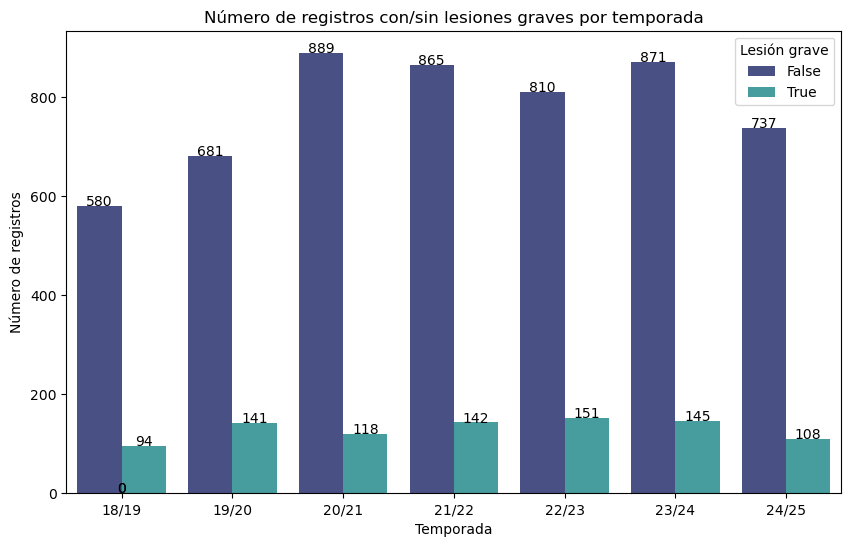

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

temporadas_ordenadas = ["18/19", "19/20", "20/21", "21/22", "22/23", "23/24", "24/25"]

plt.figure(figsize=(10,6))
ax = sns.countplot(
    x="season_1",
    hue="had_major_injury_90",
    data=dataframe_study,
    palette="mako",
    order=temporadas_ordenadas
)

plt.title("Número de registros con/sin lesiones graves por temporada")
plt.xlabel("Temporada")
plt.ylabel("Número de registros")
plt.legend(title="Lesión grave")

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,  
        height + 1,                     
        int(height),                     
        ha="center"
    )

plt.show()


/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_49739/26847304.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="had_major_injury_90", data=dataframe_study, palette="mako")


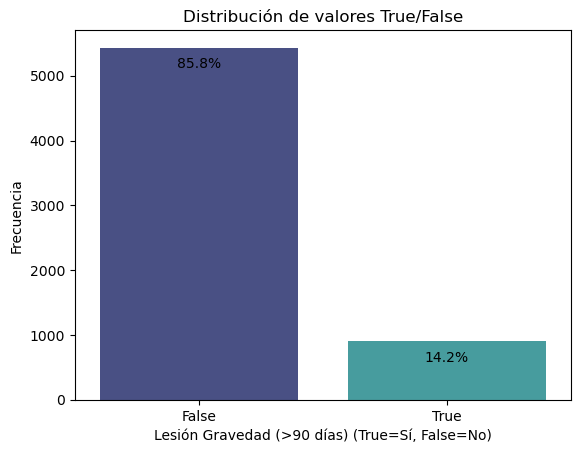

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="had_major_injury_90", data=dataframe_study, palette="mako")

total = len(dataframe_study)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.text(
        p.get_x() + p.get_width() / 2.,  
        height - 0.05 * total,          
        percentage,
        ha="center"
    )

plt.title("Distribución de valores True/False")
plt.xlabel("Lesión Gravedad (>90 días) (True=Sí, False=No)")
plt.ylabel("Frecuencia")
plt.show()


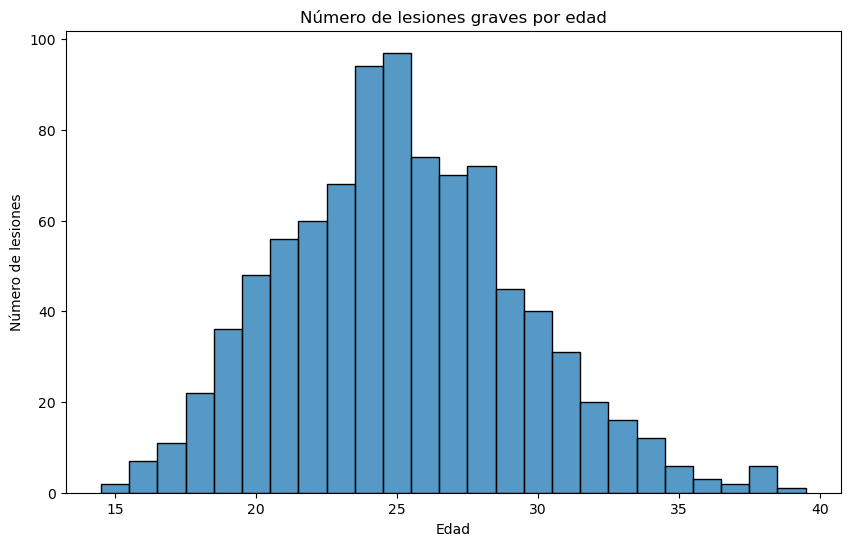

In [ ]:
df_lesiones = dataframe_study[dataframe_study["had_major_injury_90"] == True]

plt.figure(figsize=(10,6))
sns.histplot(
    data=df_lesiones,
    x="age",     
    discrete=True   
)

plt.title("Número de lesiones graves por edad")
plt.xlabel("Edad")
plt.ylabel("Número de lesiones")
plt.show()


In [10]:
dataframe_study["had_major_injury_90"].value_counts()

had_major_injury_90
False    5433
True      899
Name: count, dtype: int64

In [11]:
dataframe_study=dataframe_study.drop(columns='Unnamed: 0_y')

In [12]:
num_cols = dataframe_study.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = dataframe_study.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

In [13]:
dataframe_study.describe()

,age,born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,...,passing,dribbling,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength
count,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,6332.000000,...,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000,5262.000000
mean,25.782059,1994.018320,21.241472,16.262160,1453.980417,16.155764,2.290745,1.585597,3.876342,2.083702,...,65.754086,70.786963,59.059483,69.274040,70.756366,71.284873,71.767199,67.855758,71.486507,69.278981
std,4.420077,4.504545,10.781248,10.913777,938.205822,10.424716,3.804406,2.274157,5.362933,3.371479,...,10.361750,9.809400,18.522986,9.425352,11.746043,11.214333,8.594697,12.667952,10.773599,12.156213
min,14.000000,1978.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,32.000000,15.000000,33.000000,29.000000,29.000000,37.000000,27.000000,30.000000,25.000000
25%,23.000000,1991.000000,13.000000,7.000000,656.750000,7.300000,0.000000,0.000000,0.000000,0.000000,...,59.000000,65.000000,42.000000,64.000000,64.000000,65.000000,67.000000,60.000000,65.000000,62.000000
50%,25.000000,1994.000000,23.000000,16.000000,1428.500000,15.900000,1.000000,1.000000,2.000000,1.000000,...,67.000000,72.000000,66.000000,71.000000,72.000000,72.000000,73.000000,69.000000,72.000000,71.000000
75%,29.000000,1997.000000,30.000000,25.000000,2209.000000,24.500000,3.000000,2.000000,5.000000,3.000000,...,73.000000,78.000000,74.000000,76.000000,78.000000,79.000000,77.000000,77.000000,78.000000,78.000000
max,39.000000,2007.000000,38.000000,38.000000,3420.000000,38.000000,41.000000,21.000000,48.000000,33.000000,...,94.000000,96.000000,91.000000,91.000000,97.000000,96.000000,96.000000,96.000000,97.000000,95.000000


In [14]:
df_clean = dataframe_study.dropna()

In [15]:
df_clean

,player,season_1,had_major_injury_90,season_x,last_season,season_y,nation,pos,age,born,...,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength,season_2,matched_short_name
0,Aaron Cresswell,18/19,False,18/19,17/18,17/18,ENG,DF,27.0,1989.0,...,73.0,68.0,75.0,76.0,68.0,90.0,82.0,59.0,18/19,Aaron Cresswell
1,Aaron Cresswell,19/20,False,19/20,18/19,18/19,ENG,DF,28.0,1989.0,...,74.0,69.0,74.0,72.0,73.0,85.0,74.0,62.0,19/20,Aaron Cresswell
2,Aaron Cresswell,20/21,False,20/21,19/20,19/20,ENG,DF,29.0,1989.0,...,74.0,67.0,74.0,69.0,73.0,83.0,71.0,61.0,20/21,Aaron Cresswell
3,Aaron Cresswell,24/25,False,24/25,23/24,23/24,ENG,"DF,FW",33.0,1989.0,...,77.0,67.0,66.0,51.0,78.0,75.0,73.0,61.0,24/25,Aaron Cresswell
4,Aaron Mooy,18/19,False,18/19,17/18,17/18,AUS,MF,26.0,1990.0,...,66.0,76.0,67.0,70.0,69.0,73.0,78.0,76.0,18/19,Aaron Mooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,İlkay Gündoğan,18/19,False,18/19,17/18,17/18,GER,MF,26.0,1990.0,...,64.0,71.0,73.0,70.0,87.0,81.0,71.0,74.0,18/19,İlkay Gündoğan
6322,İlkay Gündoğan,19/20,False,19/20,18/19,18/19,GER,MF,27.0,1990.0,...,69.0,70.0,67.0,68.0,85.0,78.0,69.0,72.0,19/20,İlkay Gündoğan
6323,İlkay Gündoğan,20/21,False,20/21,19/20,19/20,GER,MF,28.0,1990.0,...,72.0,71.0,67.0,66.0,85.0,77.0,71.0,73.0,20/21,İlkay Gündoğan
6324,İlkay Gündoğan,21/22,False,21/22,20/21,20/21,GER,MF,29.0,1990.0,...,72.0,71.0,66.0,66.0,85.0,77.0,69.0,73.0,21/22,İlkay Gündoğan


In [16]:
df_test = df_clean[df_clean['season_1'] == '24/25']
df_train = df_clean[df_clean['season_1'] != '24/25']

In [17]:
right_skew_columns = ['Gls', 'Ast', 'G+A', 'G-PK', 'PK',
'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90']
standard_columns = ['age','born', 'MP', 'Starts', 'Min', '90s','height_cm', 'weight_kg','pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength']

In [18]:
import numpy as np

In [19]:
df_clean[right_skew_columns] = np.log1p(df_clean[right_skew_columns])

scaler = StandardScaler()
df_clean[standard_columns+right_skew_columns] = scaler.fit_transform(df_clean[standard_columns+right_skew_columns])

/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_49739/2382405508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[right_skew_columns] = np.log1p(df_clean[right_skew_columns])
/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_49739/2382405508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[standard_columns+right_skew_columns] = scaler.fit_transform(df_clean[standard_columns+right_skew_columns])


Es un 16% el conjunto de entrenamiento

In [20]:
ordinal_vars = ['player', 'season_1', 'nation']
onehot_vars = ['pos', 'work_rate', 'body_type']
target = 'had_major_injury_90' 

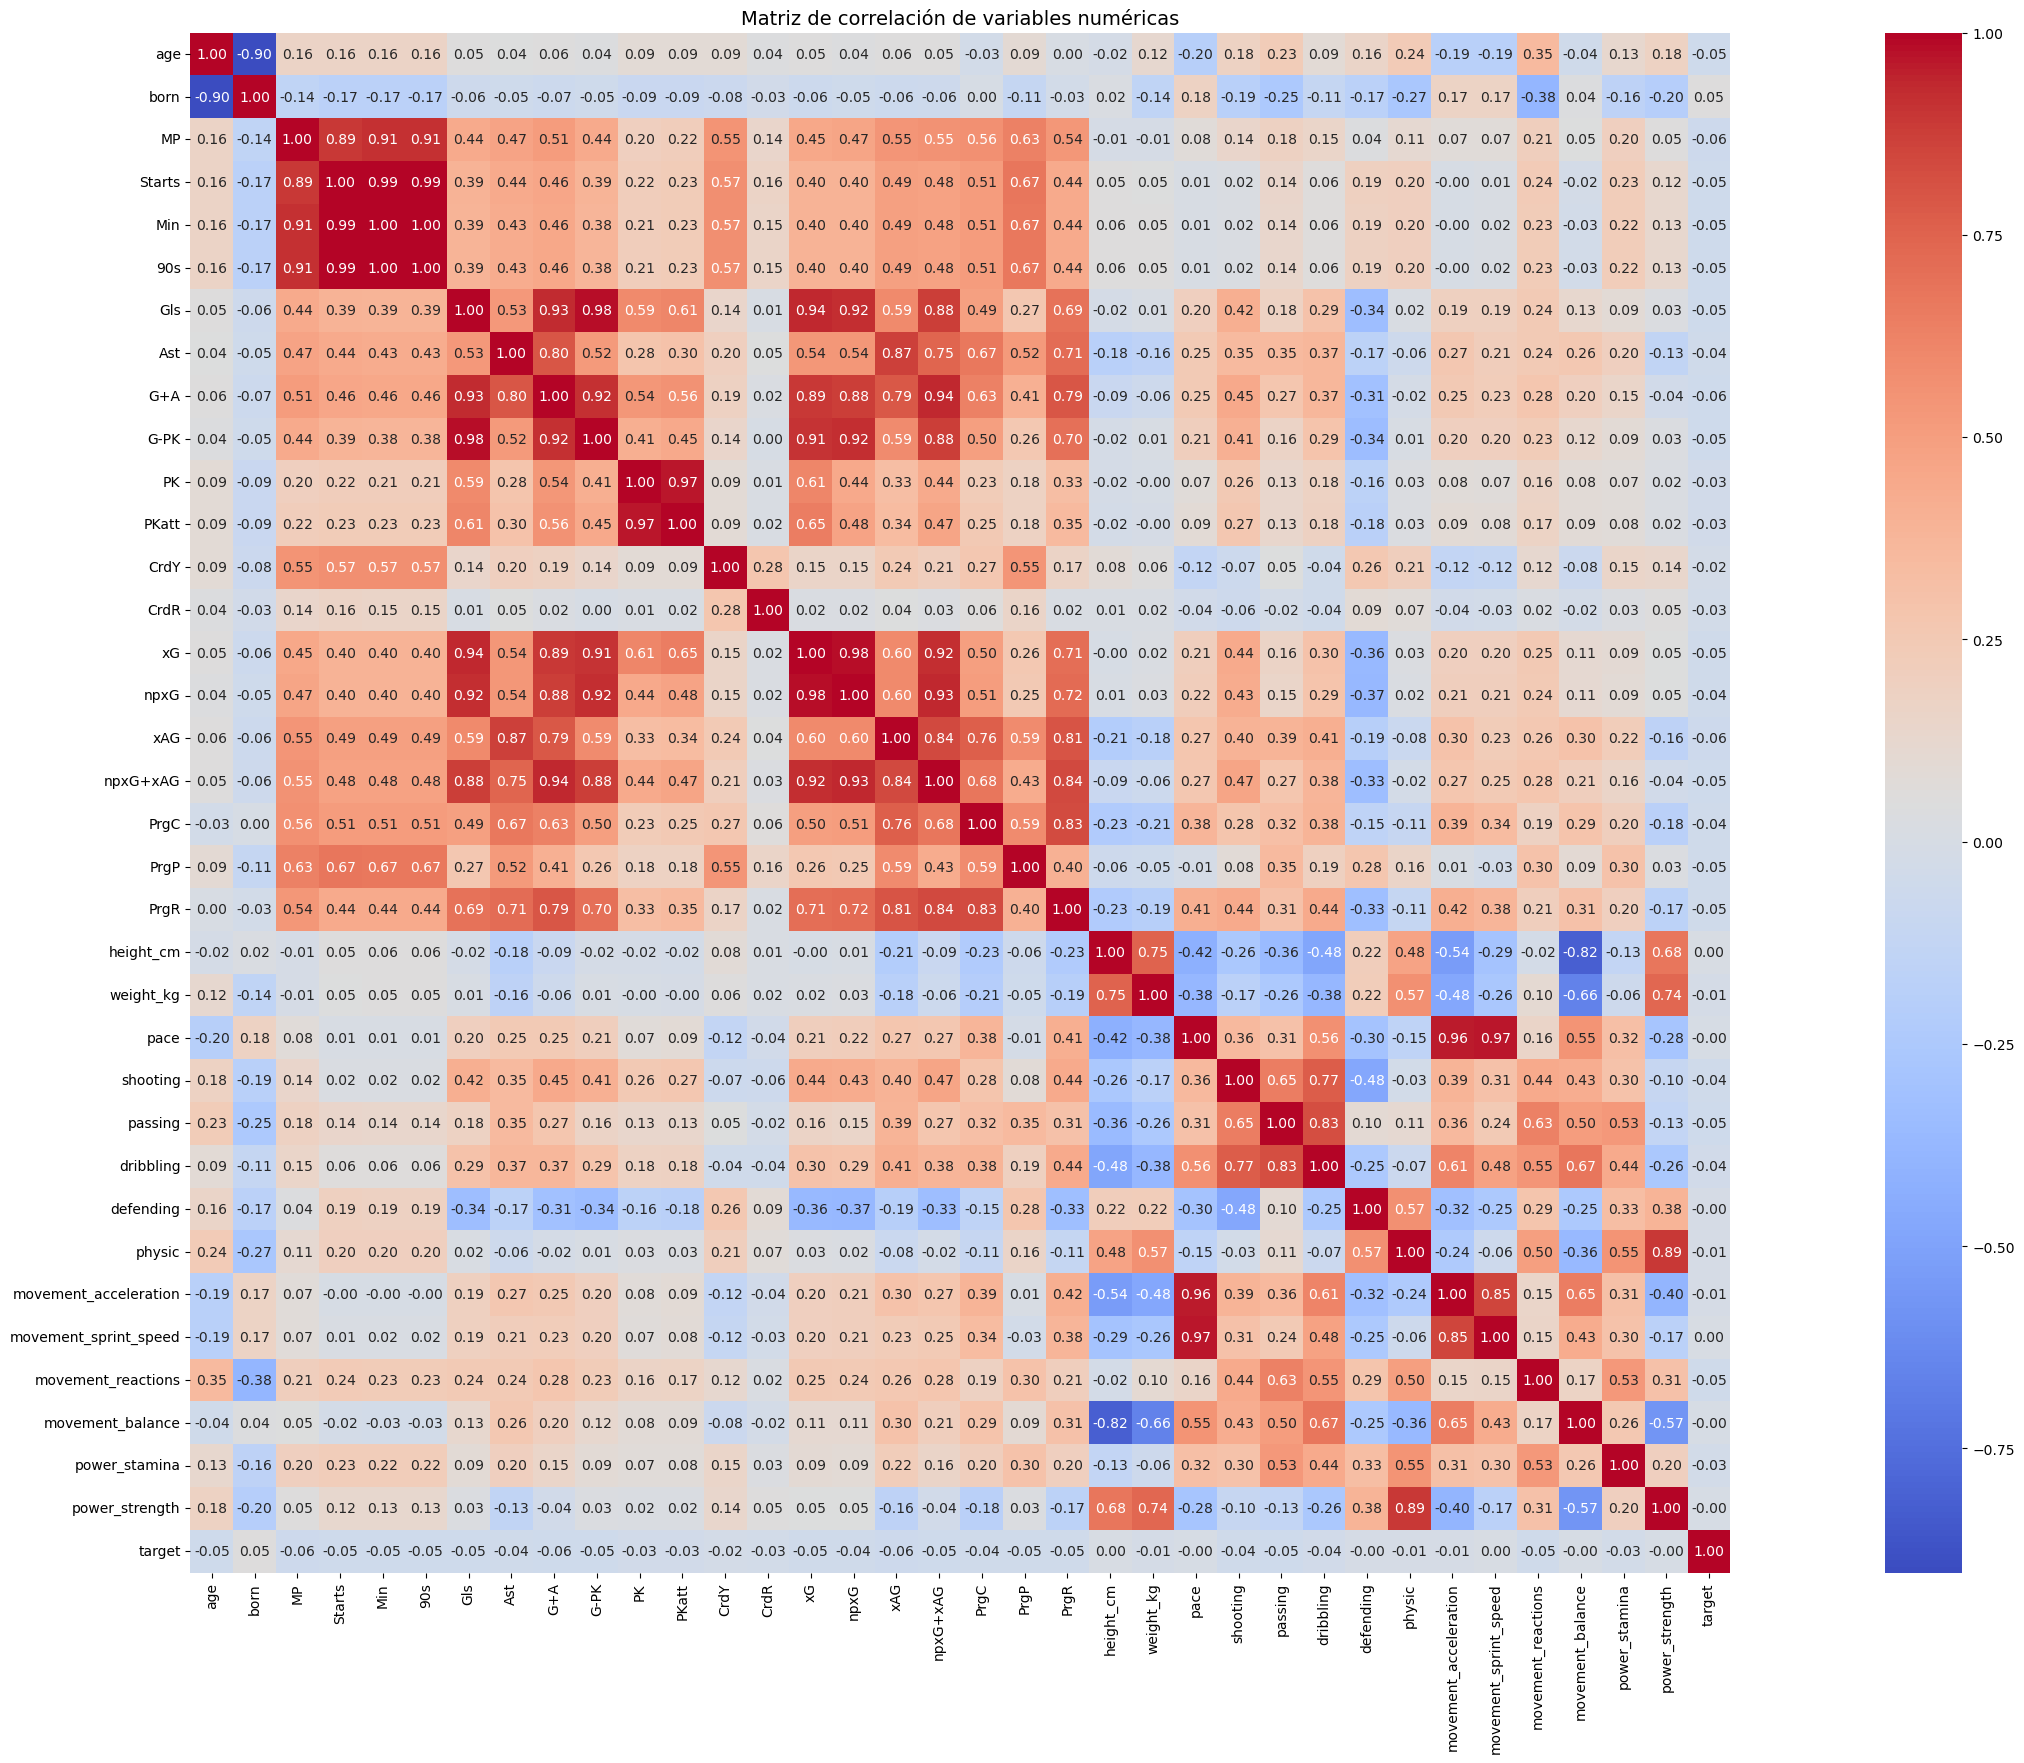

In [ ]:

numeric_df = dataframe_study.select_dtypes(include=["int64", "float64"])
numeric_df["target"]=dataframe_study["had_major_injury_90"].astype(int)
numeric_df.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'],inplace=True)

corr_matrix = numeric_df.corr()

plt.figure(figsize=(40,20))
sns.heatmap(
    corr_matrix, 
    annot=True,       
    fmt=".2f",        
    cmap="coolwarm", 
    cbar=True,       
    square=True      
)

plt.title("Matriz de correlación de variables numéricas", fontsize=14)
plt.show()


In [22]:
num_cols_drop = ['G+A','G-PK','PKatt','npxG+xAG','npxG','PKatt']
df_clean.drop(columns=num_cols_drop,inplace=True)


/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_49739/3632065400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=num_cols_drop,inplace=True)


In [23]:
df_clean.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'],inplace=True)

/var/folders/j5/9lpkspn53fz9cq8v48z2qbl00000gn/T/ipykernel_49739/2401219777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',


In [24]:
X_train = df_train.drop(columns=target)
y_train = df_train[target]

X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [25]:
X_train

,player,season_1,season_x,last_season,season_y,nation,pos,age,born,MP,...,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength,season_2,matched_short_name
0,Aaron Cresswell,18/19,18/19,17/18,17/18,ENG,DF,27.0,1989.0,36.0,...,73.0,68.0,75.0,76.0,68.0,90.0,82.0,59.0,18/19,Aaron Cresswell
1,Aaron Cresswell,19/20,19/20,18/19,18/19,ENG,DF,28.0,1989.0,20.0,...,74.0,69.0,74.0,72.0,73.0,85.0,74.0,62.0,19/20,Aaron Cresswell
2,Aaron Cresswell,20/21,20/21,19/20,19/20,ENG,DF,29.0,1989.0,31.0,...,74.0,67.0,74.0,69.0,73.0,83.0,71.0,61.0,20/21,Aaron Cresswell
4,Aaron Mooy,18/19,18/19,17/18,17/18,AUS,MF,26.0,1990.0,36.0,...,66.0,76.0,67.0,70.0,69.0,73.0,78.0,76.0,18/19,Aaron Mooy
5,Aaron Mooy,19/20,19/20,18/19,18/19,AUS,"MF,FW",27.0,1990.0,29.0,...,70.0,75.0,64.0,62.0,74.0,74.0,77.0,74.0,19/20,Aaron Mooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,Ömer Toprak,21/22,21/22,20/21,20/21,TUR,DF,31.0,1989.0,26.0,...,78.0,71.0,66.0,73.0,78.0,61.0,55.0,78.0,21/22,Ömer Toprak
6321,İlkay Gündoğan,18/19,18/19,17/18,17/18,GER,MF,26.0,1990.0,30.0,...,64.0,71.0,73.0,70.0,87.0,81.0,71.0,74.0,18/19,İlkay Gündoğan
6322,İlkay Gündoğan,19/20,19/20,18/19,18/19,GER,MF,27.0,1990.0,31.0,...,69.0,70.0,67.0,68.0,85.0,78.0,69.0,72.0,19/20,İlkay Gündoğan
6323,İlkay Gündoğan,20/21,20/21,19/20,19/20,GER,MF,28.0,1990.0,31.0,...,72.0,71.0,67.0,66.0,85.0,77.0,71.0,73.0,20/21,İlkay Gündoğan


In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_vars),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), onehot_vars)
    ]
)

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score


In [28]:
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('modelDummy', DummyClassifier(strategy="most_frequent"))
])

In [29]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('modelDummy', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('ohe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
train_predicted = pipeline.predict(X_train)

In [31]:
print(classification_report(y_train,train_predicted))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92      3901
        True       0.00      0.00      0.00       638

    accuracy                           0.86      4539
   macro avg       0.43      0.50      0.46      4539
weighted avg       0.74      0.86      0.79      4539



/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

In [ ]:
y_pred = pipeline.predict(X_test)

print("Precision DummyClassifier:", precision_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Precision DummyClassifier: 0.0

Reporte de clasificación:
               precision    recall  f1-score   support

       False       0.88      1.00      0.94       636
        True       0.00      0.00      0.00        87

    accuracy                           0.88       723
   macro avg       0.44      0.50      0.47       723
weighted avg       0.77      0.88      0.82       723



/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

In [35]:
columns = ['player', 'season_1', 'nation', 'pos', 'age', 'born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'PK', 'CrdY', 'CrdR', 'xG', 'xAG', 'PrgC',
       'PrgP', 'PrgR', 'height_cm', 'weight_kg',
       'work_rate', 'body_type', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'movement_acceleration', 'movement_sprint_speed',
       'movement_reactions', 'movement_balance', 'power_stamina',
       'power_strength']

In [36]:
X_train = X_train[columns]
X_test = X_test[columns]

In [37]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

In [38]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=4)
gb = GradientBoostingClassifier()
svm = SVC()
kNN = KNeighborsClassifier()
nB = GaussianNB()

In [39]:
lr.fit(X_train_p, y_train)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
y_pred_train = lr.predict(X_train_p)
prec_train = precision_score(y_train, y_pred_train)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [41]:
y_pred_train

array([False, False, False, ..., False, False, False])

In [42]:
np.unique(y_pred_train)

array([False])

In [43]:
len(y_train)

4539

In [44]:
y_pred = lr.predict(X_test_p)
prec_test= precision_score(y_test, y_pred)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

results = []
results_test=[]

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

for name, model in models.items():
    model.fit(X_train_p, y_train)
    y_pred_train = model.predict(X_train_p)
    prec_train = precision_score(y_train, y_pred_train)
    y_pred = model.predict(X_test_p)
    prec_test= precision_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Precision': prec_train
    })

    results_test.append({
        'Model': name,
        'Precision': prec_test
    })


results_df = pd.DataFrame(results).sort_values(by='Precision', ascending=False)
results_df_test = pd.DataFrame(results_test).sort_values(by='Precision', ascending=False)


In [ ]:
import pandas as pd
from sklearn.utils import resample


df_majority = df_clean[df_clean.had_major_injury_90 == False]
df_minority = df_clean[df_clean.had_major_injury_90 == True]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,     
                                   n_samples=len(df_minority), 
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced.had_major_injury_90.value_counts())


had_major_injury_90
False    725
True     725
Name: count, dtype: int64


In [49]:
df_test2 = df_balanced[df_balanced['season_1'] == '24/25']
df_train2 = df_balanced[df_balanced['season_1'] != '24/25']

In [50]:
X_train2 = df_train2.drop(columns=target)
y_train2 = df_train2[target]

X_test2 = df_test2.drop(columns=target)
y_test2 = df_test2[target]

In [51]:
X_train_p2 = preprocessor.fit_transform(X_train2)
X_test_p2 = preprocessor.transform(X_test2)

In [52]:
lr.fit(X_train_p2, y_train2)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [53]:
y_pred_train2 = lr.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)

In [54]:
prec_train

0.5670261941448382

In [55]:
y_pred = lr.predict(X_test_p2)

In [56]:
prec_test = precision_score(y_test2, y_pred)

In [57]:
prec_test

0.43103448275862066

In [58]:
rf = RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=4)
rf.fit(X_train_p2, y_train2)
y_pred_train2 = rf.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = rf.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)

In [59]:
prec_train, prec_test

(0.71499176276771, 0.4583333333333333)

In [60]:
gb.fit(X_train_p2, y_train2)
y_pred_train2 = gb.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = gb.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)
prec_train, prec_test

(0.7884615384615384, 0.4927536231884058)

In [61]:
svm.fit(X_train_p2, y_train2)
y_pred_train2 = svm.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = svm.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)
prec_train, prec_test

(0.5528846153846154, 0.35)

In [62]:
kNN.fit(X_train_p2, y_train2)
y_pred_train2 = kNN.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = kNN.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)
prec_train, prec_test

(0.7245696400625978, 0.4883720930232558)

In [64]:
X_train_p2

<1265x31 sparse matrix of type '<class 'numpy.float64'>'
	with 7449 stored elements in Compressed Sparse Row format>

In [ ]:
X_dense2 = X_train_p2.toarray()
X_test_dense_p2 = X_test_p2.toarray()   

In [68]:
nB.fit(X_dense2, y_train2)
y_pred_train2 = nB.predict(X_dense2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = nB.predict(X_test_dense_p2)
prec_test = precision_score(y_test2, y_pred)
prec_train, prec_test

(0.5496503496503496, 0.4789915966386555)

In [58]:
dc = DummyClassifier(strategy="most_frequent")
dc.fit(X_train_p2, y_train2)
y_pred_train2 = dc.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = dc.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)
prec_train, prec_test

(0.5043478260869565, 0.4702702702702703)

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6]}
grid = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_dense2, y_train2)
print(grid.best_params_, grid.best_score_)


{'var_smoothing': 1e-07} 0.4450592885375494


In [ ]:
y_pred_train = grid.predict(X_dense2)
y_pred = grid.predict(X_test_dense_p2)
print("\nReporte de clasificación NB Hipertuned (test):\n", classification_report(y_test2, y_pred))


Reporte de clasificación NB Hipertuned (test):
               precision    recall  f1-score   support

       False       0.55      0.42      0.48        98
        True       0.49      0.62      0.55        87

    accuracy                           0.51       185
   macro avg       0.52      0.52      0.51       185
weighted avg       0.52      0.51      0.51       185



In [72]:
print("Precision NB:", precision_score(y_test2, y_pred))

Precision NB: 0.4864864864864865


In [73]:
from sklearn.metrics import confusion_matrix

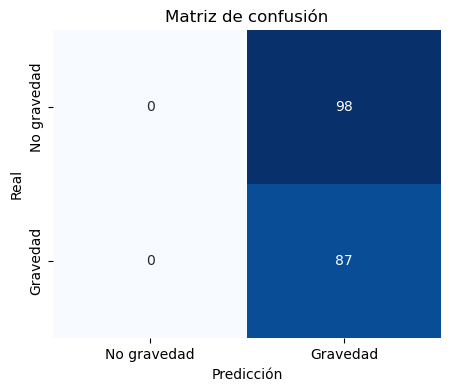

In [76]:
dc = DummyClassifier(strategy="most_frequent")
dc.fit(X_train_p2, y_train2)
y_pred_train2 = dc.predict(X_train_p2)
prec_train = precision_score(y_train2, y_pred_train2)
y_pred = dc.predict(X_test_p2)
prec_test = precision_score(y_test2, y_pred)

cm = confusion_matrix(y_test2, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No gravedad", "Gravedad"],
            yticklabels=["No gravedad", "Gravedad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

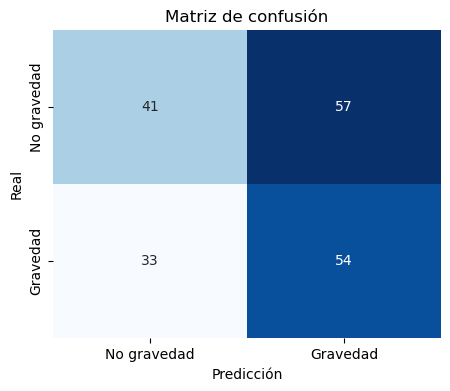

In [75]:
cm = confusion_matrix(y_test2, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No gravedad", "Gravedad"],
            yticklabels=["No gravedad", "Gravedad"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

In [ ]:
df_clean

,player,season_1,had_major_injury_90,season_x,last_season,season_y,nation,pos,age,born,...,defending,physic,movement_acceleration,movement_sprint_speed,movement_reactions,movement_balance,power_stamina,power_strength,season_2,matched_short_name
0,Aaron Cresswell,18/19,False,18/19,17/18,17/18,ENG,DF,0.252825,-1.128710,...,0.752678,-0.135184,0.361316,0.420495,-0.438358,1.748218,0.975950,-0.845655,18/19,Aaron Cresswell
1,Aaron Cresswell,19/20,False,19/20,18/19,18/19,ENG,DF,0.485855,-1.128710,...,0.806670,-0.029078,0.276173,0.063775,0.143451,1.353484,0.233323,-0.598844,19/20,Aaron Cresswell
2,Aaron Cresswell,20/21,False,20/21,19/20,19/20,ENG,DF,0.718885,-1.128710,...,0.806670,-0.241291,0.276173,-0.203765,0.143451,1.195590,-0.045162,-0.681114,20/21,Aaron Cresswell
3,Aaron Cresswell,24/25,False,24/25,23/24,23/24,ENG,"DF,FW",1.651003,-1.128710,...,0.968646,-0.241291,-0.404972,-1.809006,0.725260,0.564015,0.140495,-0.681114,24/25,Aaron Cresswell
4,Aaron Mooy,18/19,False,18/19,17/18,17/18,AUS,MF,0.019796,-0.899022,...,0.374733,0.713671,-0.319829,-0.114585,-0.321996,0.406122,0.604637,0.552940,18/19,Aaron Mooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,İlkay Gündoğan,18/19,False,18/19,17/18,17/18,GER,MF,0.019796,-0.899022,...,0.266749,0.183136,0.191030,-0.114585,1.772517,1.037697,-0.045162,0.388400,18/19,İlkay Gündoğan
6322,İlkay Gündoğan,19/20,False,19/20,18/19,18/19,GER,MF,0.252825,-0.899022,...,0.536709,0.077029,-0.319829,-0.292945,1.539794,0.800856,-0.230818,0.223859,19/20,İlkay Gündoğan
6323,İlkay Gündoğan,20/21,False,20/21,19/20,19/20,GER,MF,0.485855,-0.899022,...,0.698686,0.183136,-0.319829,-0.471305,1.539794,0.721909,-0.045162,0.306129,20/21,İlkay Gündoğan
6324,İlkay Gündoğan,21/22,False,21/22,20/21,20/21,GER,MF,0.718885,-0.899022,...,0.698686,0.183136,-0.404972,-0.471305,1.539794,0.721909,-0.230818,0.306129,21/22,İlkay Gündoğan


In [61]:
df_test = df_clean[df_clean['season_1'] == '24/25']
df_train = df_clean[df_clean['season_1'] != '24/25']

In [63]:
X_train = df_train.drop(columns=target)
y_train = df_train[target]

X_test = df_test.drop(columns=target)
y_test = df_test[target]

In [65]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

In [66]:
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train_p, y_train)

In [71]:
rf = RandomForestClassifier(n_estimators=200,max_depth=6,min_samples_leaf=4)
rf.fit(X_res, y_res)
y_pred_train2 = rf.predict(X_res)
prec_train = precision_score(y_res, y_pred_train2)
y_pred = rf.predict(X_test_p)
prec_test = precision_score(y_test, y_pred)

/Users/luisarizalopez/opt/anaconda3/envs/master_ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [76]:
gb.fit(X_res, y_res)
y_pred_train2 = gb.predict(X_res)
prec_train = precision_score(y_res, y_pred_train2)
y_pred = gb.predict(X_test_p)
prec_test = precision_score(y_test, y_pred)
prec_train,prec_test

(0.9993809965954813, 0.0)

In [77]:
svm.fit(X_res, y_res)
y_pred_train2 = svm.predict(X_res)
prec_train = precision_score(y_res, y_pred_train2)
y_pred = svm.predict(X_test_p)
prec_test = precision_score(y_test, y_pred)
prec_train,prec_test

(0.5253104106972302, 0.06666666666666667)

In [78]:
kNN.fit(X_res, y_res)
y_pred_train2 = kNN.predict(X_res)
prec_train = precision_score(y_res, y_pred_train2)
y_pred = kNN.predict(X_test_p)
prec_test = precision_score(y_test, y_pred)
prec_train,prec_test

(0.849988407141201, 0.10952380952380952)